# 12章：演習問題の解答

In [1]:
%pip install -q japanize-matplotlib-jlite py4macro
import japanize_matplotlib_jlite
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py4macro

## 演習1

### (1)

In [2]:
pwt = py4macro.data("pwt")
pwt.columns

Index(['countrycode', 'country', 'oecd', 'income_group', 'region', 'continent',
       'year', 'rgdpe', 'rgdpo', 'pop', 'emp', 'avh', 'hc', 'ccon', 'cda',
       'cgdpe', 'cgdpo', 'cn', 'ck', 'ctfp', 'cwtfp', 'rgdpna', 'rconna',
       'rdana', 'rnna', 'rkna', 'rtfpna', 'rwtfpna', 'labsh', 'irr', 'delta',
       'xr', 'pl_con', 'pl_da', 'pl_gdpo', 'i_cig', 'i_xm', 'i_xr',
       'i_outlier', 'i_irr', 'cor_exp', 'statcap', 'csh_c', 'csh_i', 'csh_g',
       'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g', 'pl_x', 'pl_m',
       'pl_n', 'pl_k'],
      dtype='object')

### (2)

In [3]:
cols = ["year", "country", "rgdpo", "pop"]
pwt = pwt[cols]

### (3)

In [4]:
pwt["gdppc"] = pwt["rgdpo"] / pwt["pop"]
pwt["gdppc_log"] = np.log( pwt["gdppc"] )

### (4)

In [5]:
exclude = ["United Arab Emirates", "Brunei Darussalam", "Qatar", "Kuwait",
           "Cayman Islands", "Saudi Arabia", "China, Macao SAR", "Bermuda"]

cond = pwt["country"].isin(exclude)
cond

,country
0,False
1,False
2,False
3,False
4,False
...,...
12805,False
12806,False
12807,False
12808,False


### (5)

In [6]:
~cond

,country
0,True
1,True
2,True
3,True
4,True
...,...
12805,True
12806,True
12807,True
12808,True


### (6)

In [7]:
pwt = pwt.loc[~cond, :]

### (7)

In [8]:
countries = pwt["country"].unique()

In [9]:
num = pwt["country"].nunique()
print(f"{num}カ国含まれる。")

175カ国含まれる。


### (8)

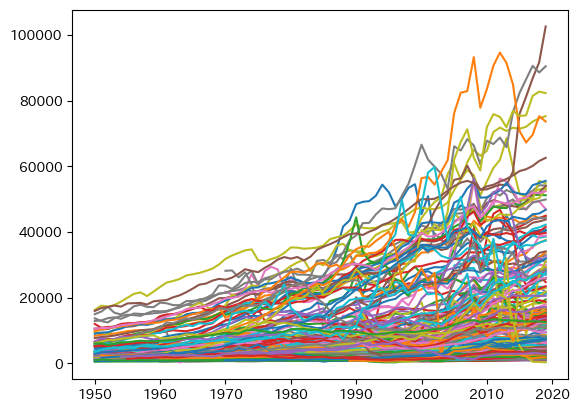

In [10]:
for c in countries:

    cond = ( pwt["country"]==c )
    dfc = pwt.loc[cond,:]
    plt.plot("year", "gdppc", data=dfc)

### (9)

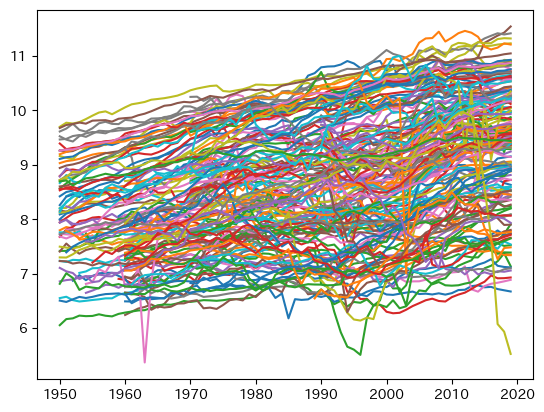

In [11]:
for c in countries:

    cond = ( pwt["country"]==c )
    dfc = pwt.loc[cond,:]
    plt.plot("year", "gdppc_log", data=dfc)

## 演習2

### (1)

In [27]:
mad = py4macro.data("mad")
mad.columns

Index(['countrycode', 'country', 'region', 'year', 'gdppc', 'pop'], dtype='object')

### (2)

In [28]:
exclude = ["Kuwait", "Qatar", "United Arab Emirates"]
cond = mad["country"].isin(exclude)
mad = mad.loc[~cond,:]

### (3)

In [29]:
mad["gdppc_log"] = np.log( mad["gdppc"] )

### (4)

In [30]:
countries = mad["country"].unique()

In [31]:
num = mad["country"].nunique()
print(f"{num}カ国含まれる。")

166カ国含まれる。


### (5)

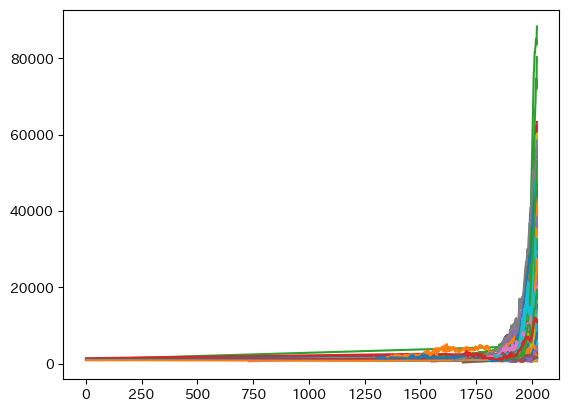

In [32]:
for c in countries:

    cond = ( mad["country"]==c )
    dfc = mad.loc[cond,:]
    plt.plot("year", "gdppc", data=dfc)

### (6)

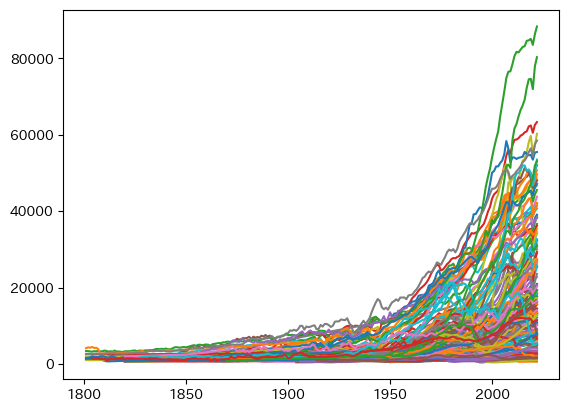

In [33]:
for c in countries:

    cond = ( mad["country"]==c ) & ( mad["year"]>1800 )
    dfc = mad.loc[cond,:]
    plt.plot("year", "gdppc", data=dfc)